# Titanic Dataset Analysis

## Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
data=pd.read_csv('titanic_train_dc904cdc-94af-4bfb-b2b8-240e0af633f7.csv')

## Initial Exploration

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

**Shape**: `(891, 12)` → 891 passengers and 12 features.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Describe**:  
  - Average age ~ 29.7  
  - Average fare ~ 32.2 (but max = 512, highly skewed)  
  - Survival rate ~ 38% (only 342 survived).

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing Cells**:  
  - Age → 177 missing  
  - Cabin → 687 missing  
  - Embarked → 2 missing

## Data Cleaning and Preprocessing

#### Making a copy of the dataframe to keep the original untouched

In [9]:
data_cleaned = data.copy()

#### Filling missing Age values with the median Age

In [10]:
median_age = data_cleaned['Age'].median()
data_cleaned['Age'] = data_cleaned['Age'].fillna(median_age)

#### Filling missing Embarked values with the mode

In [11]:
mode_embarked = data_cleaned['Embarked'].mode()[0]
data_cleaned['Embarked'] = data_cleaned['Embarked'].fillna(mode_embarked)

#### Dropping the Cabin column due to a large number of missing values

In [12]:
data_cleaned.drop('Cabin', axis=1, inplace=True)

### Verifying the changes

In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
data_cleaned.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Final dataset has **no missing values**.

In [14]:
data_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Analysis

### Survival Distribution

In [15]:
data_cleaned[['Survived']].value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

Only **342 survived** vs **549 died**.

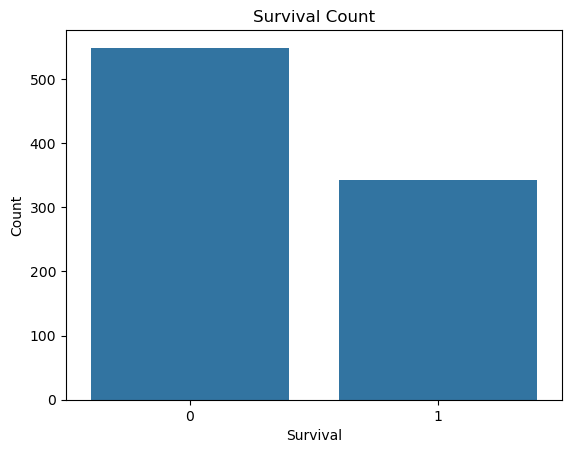

In [16]:
sns.countplot(x='Survived', data=data_cleaned)
plt.title('Survival Count')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

In [17]:
survival_rate=(data_cleaned['Survived'].sum()/len(data_cleaned))*100
print(f'The survival rate is {survival_rate:.2f}%')

The survival rate is 38.38%


### Passenger Class Analysis

In [18]:
data_cleaned[['Pclass']].value_counts()

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

Most passengers were in **3rd class**.

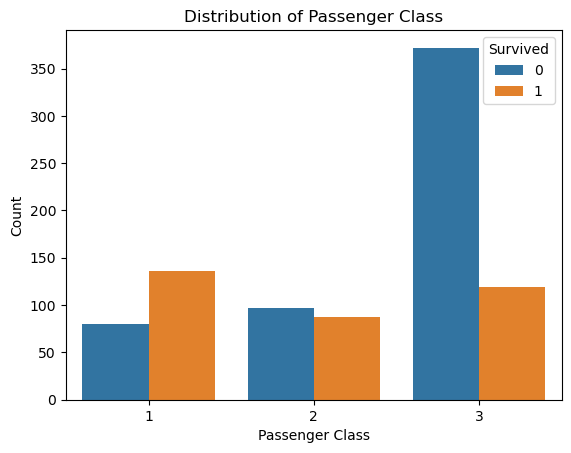

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=data_cleaned)
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

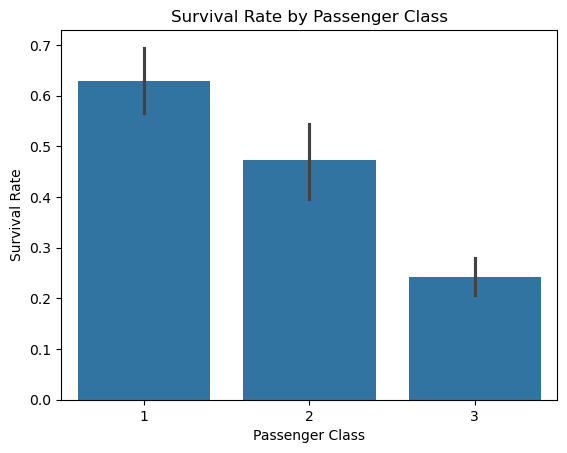

In [20]:
sns.barplot(x='Pclass', y='Survived', data=data_cleaned)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**Survival by Class**:  
  - 1st class → highest survival  
  - 3rd class → lowest survival  

Wealth/class strongly influenced chances of survival.

### Gender Analysis

In [21]:
data_cleaned[['Sex']].value_counts()

Sex   
male      577
female    314
Name: count, dtype: int64

Count: 577 males, 314 females.

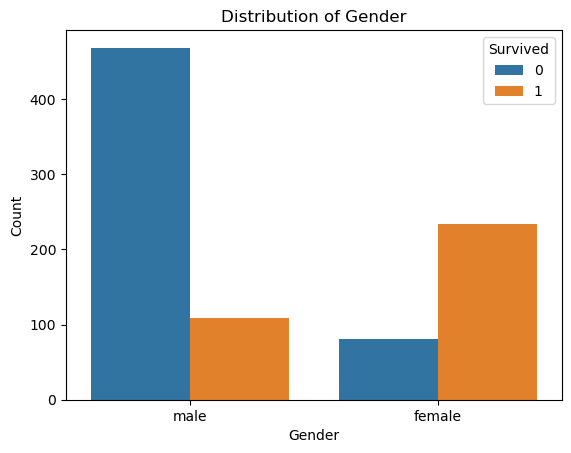

In [22]:
sns.countplot(x='Sex', hue='Survived', data=data_cleaned)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

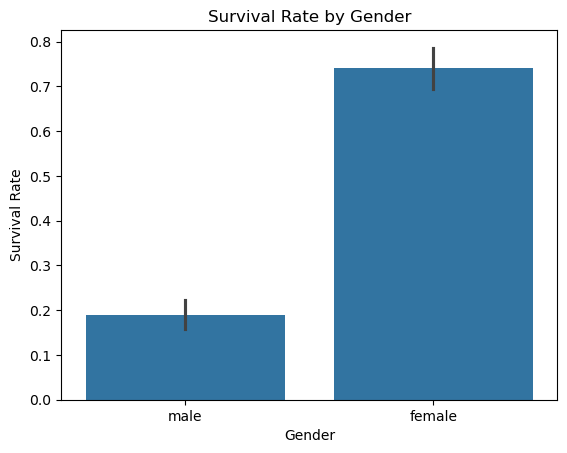

In [23]:
sns.barplot(x='Sex', y='Survived', data=data_cleaned)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

**Survival**:  
  - Women survived much more than men.  
  - Most men died.  

Confirms **“Women and children first” policy** during evacuation.

### Embarkation Port Analysis

Ports: Southampton (S), Cherbourg (C), Queenstown (Q).

In [25]:
data_cleaned[['Embarked']].value_counts()

Embarked
S           646
C           168
Q            77
Name: count, dtype: int64

**Counts**: Majority from Southampton.

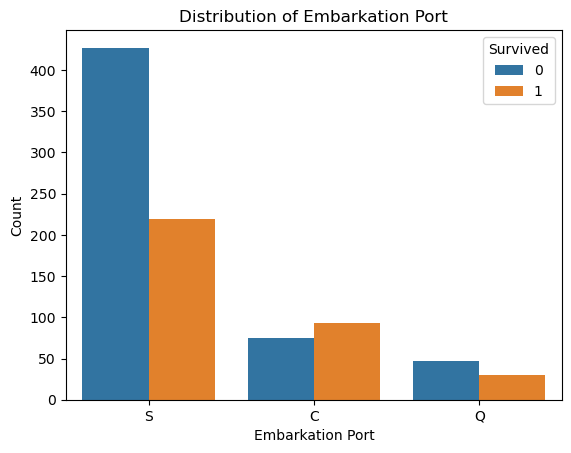

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=data_cleaned)
plt.title('Distribution of Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

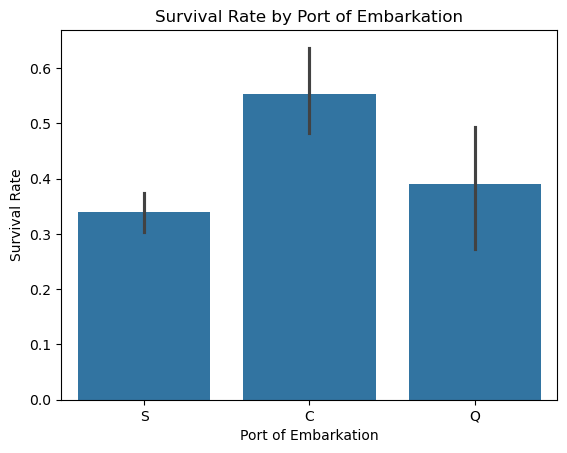

In [27]:
sns.barplot(x='Embarked', y='Survived', data=data_cleaned)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

**Survival rates**:  
  - Cherbourg (C) → highest survival  
  - Southampton (S) → lowest survival  
  
Port of embarkation played a role in survival.

### Age Distribution

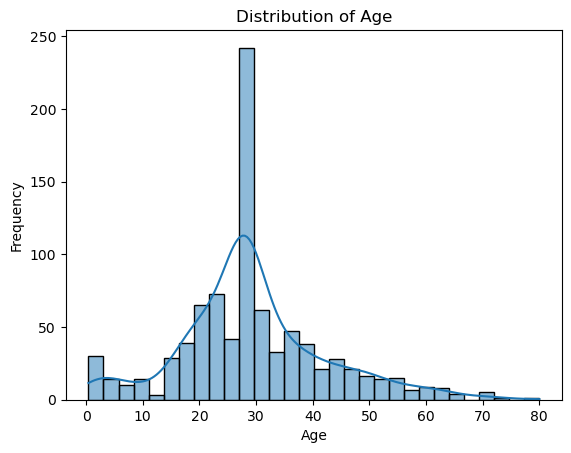

In [28]:
sns.histplot(data_cleaned['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Histogram**: Most passengers between 20–40 years.

Text(0, 0.5, 'Age')

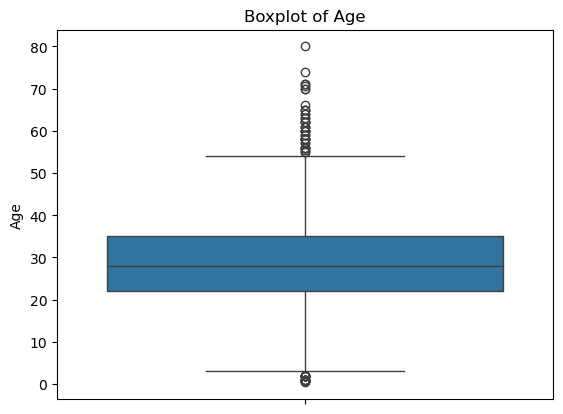

In [29]:
sns.boxplot(y='Age', data=data_cleaned)
plt.title('Boxplot of Age')
plt.ylabel('Age')

**Boxplot**: Outliers include children and very old passengers.

Text(0.5, 0, 'Theoretical Quantiles')

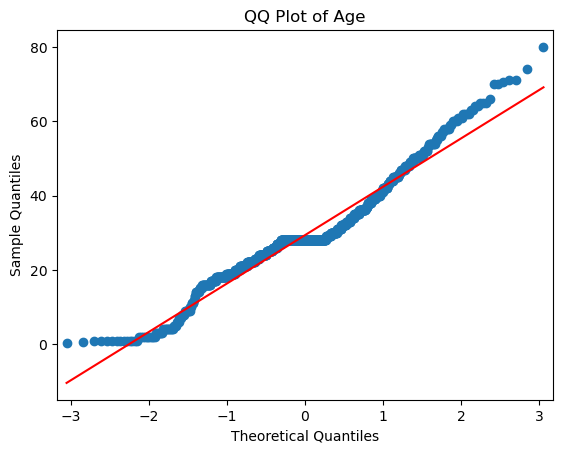

In [30]:
sm.qqplot(data_cleaned['Age'], line='s')
plt.title('QQ Plot of Age')
plt.xlabel('Theoretical Quantiles')

**QQ plot**: Roughly normal distribution, but with heavy tails.

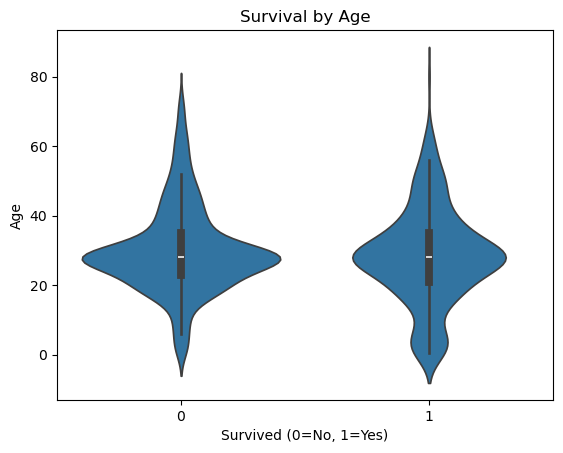

In [31]:
sns.violinplot(x='Survived', y='Age', data=data_cleaned)
plt.title('Survival by Age')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

**Violin plot**:  
  - Children had higher survival probability.  
  - Older passengers had lower survival.

### Fare Distribution

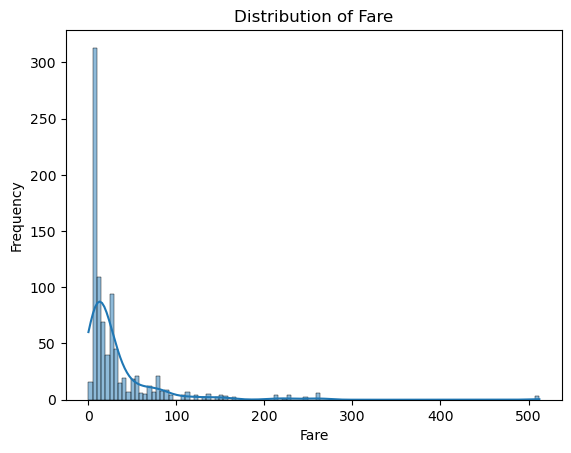

In [32]:
sns.histplot(data_cleaned['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

**Histogram**: Strongly right-skewed. Most fares < 50.

Text(0, 0.5, 'Fare')

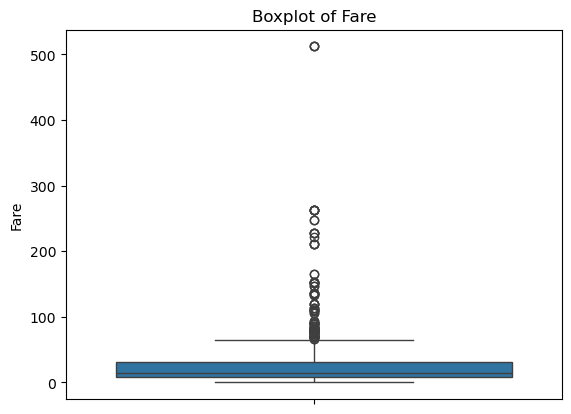

In [33]:
sns.boxplot(y='Fare', data=data_cleaned)
plt.title('Boxplot of Fare')
plt.ylabel('Fare')

**Boxplot**: Outliers → very wealthy passengers.

Text(0.5, 0, 'Theoretical Quantiles')

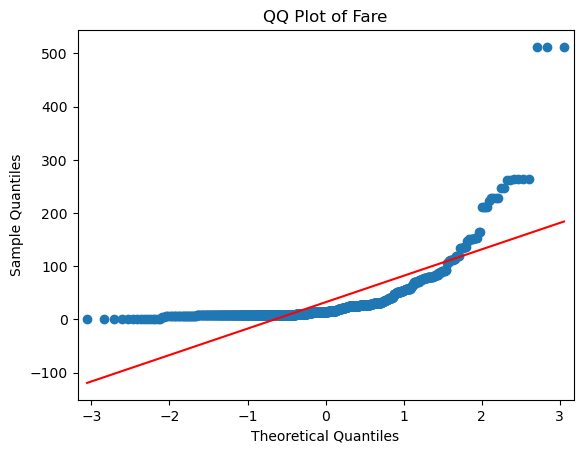

In [34]:
sm.qqplot(data_cleaned['Fare'], line='s')
plt.title('QQ Plot of Fare')
plt.xlabel('Theoretical Quantiles')

**QQ plot**: Deviates heavily from normal due to skewness.

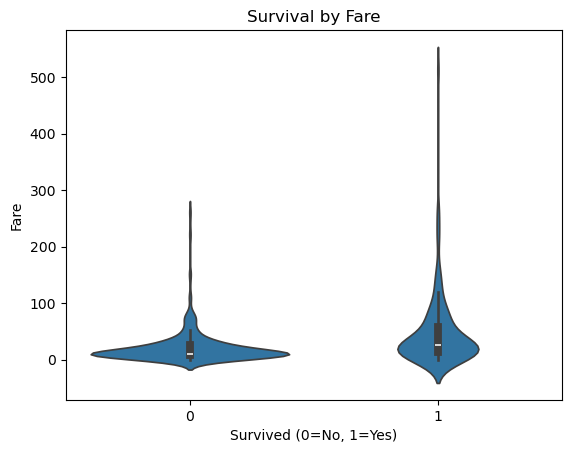

In [35]:
sns.violinplot(x='Survived', y='Fare', data=data_cleaned)
plt.title('Survival by Fare')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare')
plt.show()

**Violin plot**:  
  - Higher fare → higher survival.  
  - Wealthier passengers had better chances.

#### Age vs Fare Scatter Plot (Survival)

Scatter plot shows how **Age** and **Fare** together relate to survival.

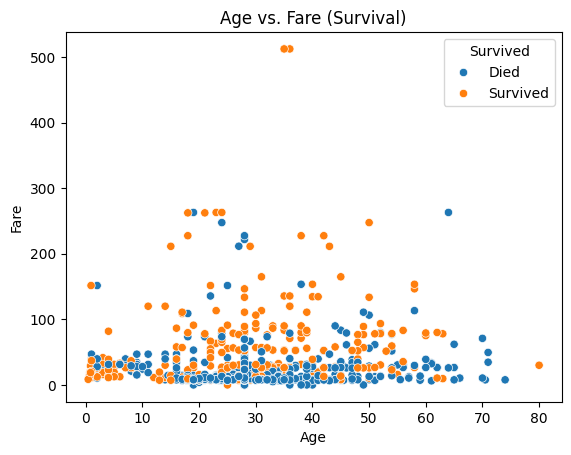

In [36]:
scatter_plot=sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data_cleaned)
plt.title('Age vs. Fare (Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Died', 'Survived'], title='Survived')

**Trends observed**:
  - Many passengers clustered at lower fares (<50) and ages between 20–40.
  - Younger passengers (especially children) survived more, even at lower fares.
  - Some very old passengers are visible, mostly with lower survival rates.

Conclusion: **Wealth (high fare) and youth (low age)** improved chances of survival.

### Pair Plot of Key Features

The pair plot allows us to visualize relationships between multiple numerical variables at once, while also distinguishing survival status.

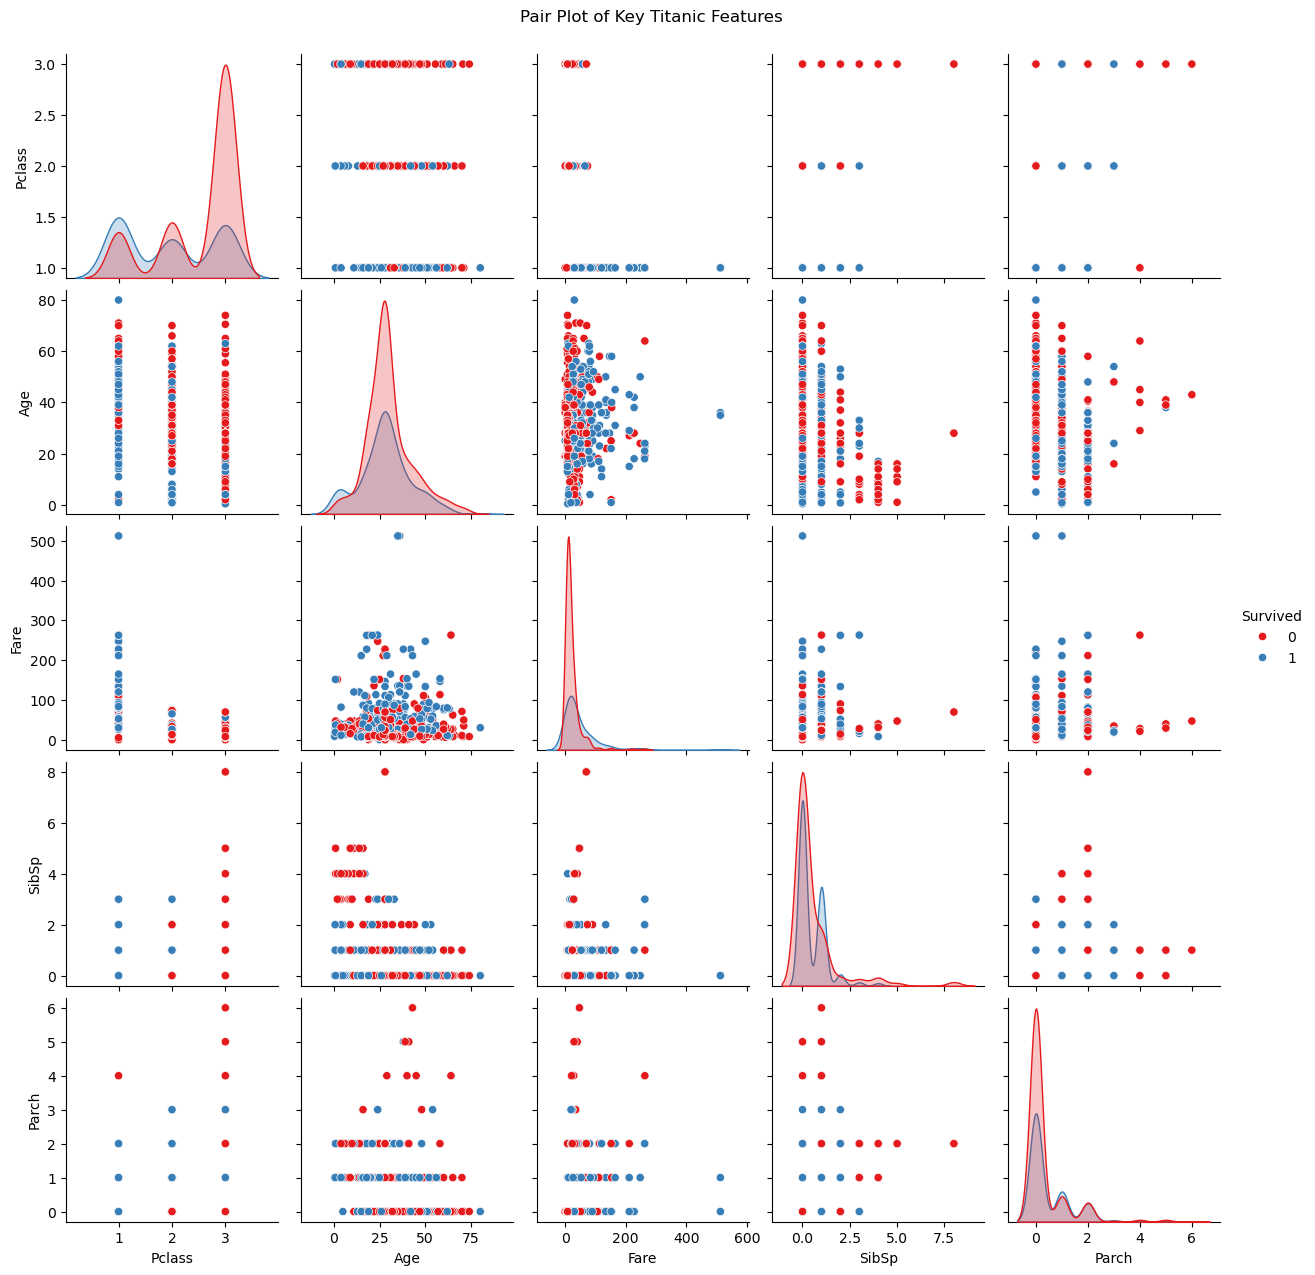

In [36]:
features = ["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]

# Creating pairplot
sns.pairplot(data_cleaned[features], hue="Survived", diag_kind="kde", palette="Set1")

plt.suptitle("Pair Plot of Key Titanic Features", y=1.02)
plt.show()

**Observations:**

- **Diagonal plots** (KDEs):  
  - Survived passengers (blue) show different distributions compared to non-survivors (red).  
  - For example, survivors are more concentrated in lower `Pclass` and higher `Fare`.  

- **Pclass vs Fare**:  
  - 1st-class passengers paid higher fares, and survival was more common among them.  
  - 3rd-class passengers (low fares) had poor survival chances.  

- **Age vs Fare**:  
  - Younger children and high-fare passengers had a better chance of survival.  
  - Many adult passengers with low fares did not survive.  

- **SibSp / Parch**:  
  - Most passengers had few or no relatives aboard.  
  - Larger families are rare and survival among them appears lower.


**Conclusion:**

- The pair plot visually confirms that **Sex, Class, Age, and Fare** are strong survival indicators.  
- Survivors cluster in **lower Pclass, higher Fare, and younger Age ranges**.

### Correlation Matrix Heatmap

A correlation matrix shows how numerical variables relate to each other.

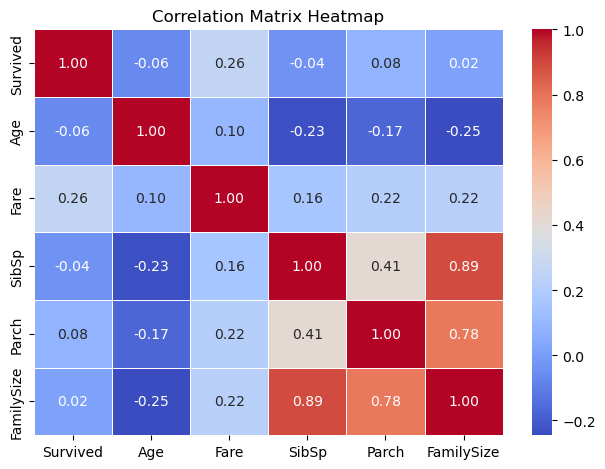

In [37]:
# Creating 'FamilySize' column
data_cleaned['FamilySize'] = data_cleaned['SibSp'] + data_cleaned['Parch'] + 1

# Selecting only the numerical columns for the correlation matrix
numerical_df = data_cleaned[['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']]

# Calculating the correlation matrix
corr_matrix = numerical_df.corr()

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

**Observations:**
  - **Survived** is **negatively correlated** with `Pclass` → higher class (lower Pclass number) = higher survival.
  - **Fare** is **positively correlated** with survival → passengers who paid higher fares had better chances.
  - `SibSp` and `Parch` show weak correlations with survival, but they are positively related to each other (both indicate family aboard).

**Conclusion:**
  - **Pclass and Fare** stand out as important survival indicators.

### Key Insights from the Data (Overall):
- Survival rate = **38%** only.  
- **Sex & Class** were the strongest predictors of survival.  
- **Women, children, and wealthy (1st class) passengers** had the highest chances.  
- Port of embarkation mattered → Cherbourg passengers fared better.  
- Higher fares & younger ages generally improved survival probability.